<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figures-for-the-capital-accumulation-section" data-toc-modified-id="Figures-for-the-capital-accumulation-section-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figures for the capital accumulation section</a></span><ul class="toc-item"><li><span><a href="#Load-data-and-check-calibration-targets" data-toc-modified-id="Load-data-and-check-calibration-targets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data and check calibration targets</a></span></li></ul></li><li><span><a href="#Standard-Hansen-and-Sargent-(2001)" data-toc-modified-id="Standard-Hansen-and-Sargent-(2001)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Standard Hansen and Sargent (2001)</a></span></li><li><span><a href="#Parameter-Uncertainty" data-toc-modified-id="Parameter-Uncertainty-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parameter Uncertainty</a></span><ul class="toc-item"><li><span><a href="#Figures-for-Pricing-section" data-toc-modified-id="Figures-for-Pricing-section-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Figures for Pricing section</a></span></li><li><span><a href="#Load-in-models-with-structured-uncertainty" data-toc-modified-id="Load-in-models-with-structured-uncertainty-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Load in models with structured uncertainty</a></span><ul class="toc-item"><li><span><a href="#Term-structure-of-uncertainty-prices" data-toc-modified-id="Term-structure-of-uncertainty-prices-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Term structure of uncertainty prices</a></span></li></ul></li></ul></li><li><span><a href="#Some-other-figures" data-toc-modified-id="Some-other-figures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Some other figures</a></span><ul class="toc-item"><li><span><a href="#Figure-2---Local-mean-of-the-states" data-toc-modified-id="Figure-2---Local-mean-of-the-states-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Figure 2 - Local mean of the states</a></span></li><li><span><a href="#Figure-4---Aggregate-dynamics" data-toc-modified-id="Figure-4---Aggregate-dynamics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Figure 4 - Aggregate dynamics</a></span></li></ul></li></ul></div>

----------------------------------------------

# Figures for the capital accumulation section
----------------------------------------------

**Author:** Balint Szoke

**Date:** September 2018


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gsp
import seaborn as sns

from figs_utils_new import *

colors = sns.color_palette()

In [2]:
figures_path = './latex/figures/28/'
result_files = './code_new/result_files/28/'
states = pd.read_csv('./notebooks/figures/states.csv', index_col=0)

T = len(states.index)
z_path = np.asarray(states['filtered_state']).reshape(1, T)

In [3]:
states

cons_growth  exp_cons_growth  filtered_state
1948-03-31     0.000000         0.003734        0.000000
1948-06-30     0.011574         0.004680        0.094617
1948-09-30    -0.000547         0.004100        0.036607
1948-12-31     0.013395         0.005006        0.127185
1949-03-31     0.008096         0.005263        0.152968
...                 ...              ...             ...
2016-03-31     0.000989         0.002304       -0.142931
2016-06-30     0.006595         0.002551       -0.118317
2016-09-30     0.001939         0.002539       -0.119504
2016-12-31     0.003874         0.002628       -0.110590
2017-03-31     0.003460         0.002689       -0.104431

[277 rows x 3 columns]

In [4]:
z_path

array([[ 0.        ,  0.09461749,  0.03660709,  0.12718543,  0.1529685 ,
         0.15959314,  0.09250522,  0.12238765,  0.17799876,  0.25088556,
         0.27102653,  0.19112856,  0.27861521,  0.2293447 ,  0.29606493,
         0.28029744,  0.26922532,  0.33978455,  0.37570915,  0.39176303,
         0.36560116,  0.37357231,  0.33267117,  0.26682589,  0.26297088,
         0.25791571,  0.29900518,  0.32486007,  0.3341893 ,  0.33969807,
         0.33251599,  0.38797425,  0.38614287,  0.34887056,  0.32305139,
         0.32895121,  0.29681037,  0.27840692,  0.269458  ,  0.23923572,
         0.15482523,  0.17652913,  0.21985883,  0.22639693,  0.23923574,
         0.26028424,  0.26245941,  0.26542922,  0.23562137,  0.24049059,
         0.17683105,  0.16225323,  0.15694099,  0.19745442,  0.1649656 ,
         0.21717952,  0.22104749,  0.22826834,  0.21817205,  0.2036664 ,
         0.17311181,  0.16700365,  0.18660539,  0.18078544,  0.21097522,
         0.2426996 ,  0.26296821,  0.25423765,  0.2

--------------------------
## Load data and check calibration targets

In [3]:
model_1cap = np.load(result_files + 'model_singlecapital.npz')
model_1cap_stat = np.load(result_files + 'model_singlecapital_statistician.npz')

model_sym = np.load(result_files + "model_sym_HS.npz")
model_asym = np.load(result_files + "model_asym_HS.npz")
model_sym_HSHS = np.load(result_files + "model_sym_HSHS.npz")
model_asym_HSHS = np.load(result_files + "model_asym_HSHS.npz")
model_sym_HSHS2 = np.load(result_files + "model_sym_HSHS2.npz")
model_asym_HSHS2 = np.load(result_files + "model_asym_HSHS2.npz")

# Define models
mm_sym = Model(model_sym)
mm_asym = Model(model_asym)
mm_sym_HSHS = Model(model_sym_HSHS)
mm_asym_HSHS = Model(model_asym_HSHS)
mm_sym_HSHS2 = Model(model_sym_HSHS2)
mm_asym_HSHS2 = Model(model_asym_HSHS2)

In [4]:
mm_sym.tables2(model_1cap)
print("\n")
mm_sym.tables2(model_1cap_stat)
print("\n")
print("Symmetric (HS)")
model = mm_sym
inn = slice(model.inner, -model.inner)
print("logC_mu    : ", np.sum(model.g[inn, inn] * model.logC_mu * model.dr * model.dz))
print("logC_sigma : ", np.sum(model.g[inn, inn] * model.logC_sigma * model.dr * model.dz))
print("q          : ", model.q, '\n')

print("Asymmetric (HS)")
model = mm_asym
inn = slice(model.inner, -model.inner)
print("logC_mu    : ", np.sum(model.g[inn, inn] * model.logC_mu * model.dr * model.dz))
print("logC_sigma : ", np.sum(model.g[inn, inn] * model.logC_sigma * model.dr * model.dz))
print("q          : ", model.q, '\n')

print("Symmetric (HSHS - kappa)")
model = mm_sym_HSHS
inn = slice(model.inner, -model.inner)
print("logC_mu    : ", np.sum(model.g[inn, inn] * model.logC_mu * model.dr * model.dz))
print("logC_sigma : ", np.sum(model.g[inn, inn] * model.logC_sigma * model.dr * model.dz))
print("q          : ", model.q, '\n')

print("Asymmetric (HSHS - kappa)")
model = mm_asym_HSHS
inn = slice(model.inner, -model.inner)
print("logC_mu    : ", np.sum(model.g[inn, inn] * model.logC_mu * model.dr * model.dz))
print("logC_sigma : ", np.sum(model.g[inn, inn] * model.logC_sigma * model.dr * model.dz))
print("q          : ", model.q, '\n')

print("Symmetric (HSHS - beta1)")
model = mm_sym_HSHS2
inn = slice(model.inner, -model.inner)
print("logC_mu    : ", np.sum(model.g[inn, inn] * model.logC_mu * model.dr * model.dz))
print("logC_sigma : ", np.sum(model.g[inn, inn] * model.logC_sigma * model.dr * model.dz))
print("q          : ", model.q, '\n')

print("Asymmetric (HSHS - beta1)")
model = mm_asym_HSHS2
inn = slice(model.inner, -model.inner)
print("logC_mu    : ", np.sum(model.g[inn, inn] * model.logC_mu * model.dr * model.dz))
print("logC_sigma : ", np.sum(model.g[inn, inn] * model.logC_sigma * model.dr * model.dz))
print("q          : ", model.q, '\n')

TABLE 1
    q   |  az_til |  k_til | b_til || alpha_c | beta |  alpha_z |  kappa  |  dc   |  Ez  |  sigma(z) 
--------------------------------------------------------------------------------------------------------------
&  0.027 &  0.000 &  0.010 &  1.000 &  0.477 &  1.005 & -0.001 &  0.013 & -0.058 & -0.051 &  0.167 \\
&  0.085 &  0.000 &  0.005 &  1.000 &  0.468 &  1.026 & -0.002 &  0.010 & -0.178 & -0.158 &  0.190 \\


&  0.100 & -0.002 &  0.014 &  1.000 &  0.455 &  1.000 & -0.003 &  0.014 & -0.219 & -0.190 &  0.163 \\
&  0.200 & -0.005 &  0.014 &  1.000 &  0.427 &  1.000 & -0.005 &  0.014 & -0.437 & -0.380 &  0.163 \\
&  0.100 & -0.002 &  0.010 &  1.000 &  0.459 &  1.005 & -0.003 &  0.013 & -0.218 & -0.192 &  0.167 \\
&  0.200 & -0.004 &  0.010 &  1.000 &  0.434 &  1.005 & -0.005 &  0.013 & -0.437 & -0.385 &  0.167 \\
&  0.100 & -0.000 &  0.005 &  1.000 &  0.466 &  1.026 & -0.002 &  0.010 & -0.211 & -0.187 &  0.190 \\
&  0.200 & -0.002 &  0.005 &  1.000 &  0.448 &  1.026 & -0.004 

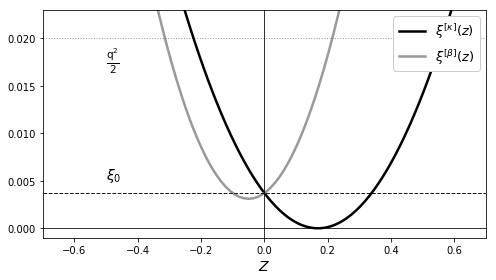

In [7]:
z_grid = np.linspace(-.8, .6, 100)
xi_grid = np.zeros(100)
xi2_grid = np.zeros(100)

s2 = np.dot(mm_sym.sigma_z_1cap, mm_sym.sigma_z_1cap)
az_k, ka_k = model_1cap[-5, 6:8]
az_b, ka_b = model_1cap[-1, 6:8]

xi0_k, xi1_k, xi2_k = model_1cap[-5, -3:]  # model_asym_HSHS["xi0"],model_asym_HSHS["xi1"]
xi0_b, xi1_b, xi2_b = model_1cap[-1, -3:]  # model_asym_HSHS2["xi0"],model_asym_HSHS2["xi1"]


for i, z in enumerate(z_grid):
    xi_grid[i] = xi0_k + 2*xi1_k*z + xi2_k*z**2
    xi2_grid[i] = xi0_b + 2*xi1_b*z + xi2_b*z**2
    
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(z_grid, xi_grid, color='k', lw=2.5, label = r"$\xi^{[\kappa]}(z)$")
ax.plot(z_grid, xi2_grid, color='gray', lw=2.5, alpha=.8, label = r"$\xi^{[\beta]}(z)$")
ax.axhline(xi0_k, color='k', linestyle='--', lw=1, alpha=.9)
ax.axhline(.2**2/2, color='k', linestyle=':', lw=1, alpha=.4)
ax.text(-.5, .0052, r"$\xi_0$", fontsize=14)
ax.text(-.5, .017, r"$\frac{\mathsf{q}^2}{2}$", fontsize=15)
#ax.arrow(-.4, .01, .05, -.002)

ax.axhline(0, color='k', lw=1, alpha=.8)
ax.axvline(0, color='k', lw=1, alpha=.8)
ax.legend(loc=1, fontsize=13, framealpha=1.)
ax.set_xlabel(r"$Z$", fontsize=14)
#ax[1].plot(z_grid, norm.pdf(z_grid, loc=az_k/ka_k, scale=np.sqrt(s2/(2*ka_k))))
#ax[1].plot(z_grid, norm.pdf(z_grid, loc=az_b/ka_b, scale=np.sqrt(s2/(2*ka_b))))
#ax[1].axhline(0, color='k', lw=1, alpha=.8)
#ax[1].axvline(0, color='k', lw=1, alpha=.8)

ax.set_ylim([-.001, .023])
ax.set_xlim([-.7, .7])
plt.tight_layout()

plt.savefig(figures_path + 'two_xi_functions.pdf')

In [22]:
# Files with much finer grid for IRFs
#model_sym_p = np.load(result_files + "model_sym_HS_p.npz")
#model_asym_p = np.load(result_files + "model_asym_HS_p.npz")
#model_sym_HSHS_p = np.load(result_files + "model_sym_HSHS_p.npz")
#model_asym_HSHS_p = np.load(result_files + "model_asym_HSHS_p.npz")
model_sym_HSHS2_p = np.load(result_files + "model_sym_HSHS2_p.npz")
#model_asym_HSHS2_p = np.load(result_files + "model_asym_HSHS2_p.npz")

#mm_sym_p = Model(model_sym_p)
#mm_asym_p = Model(model_asym_p)
#mm_sym_HSHS_p = Model(model_sym_HSHS_p)
#mm_asym_HSHS_p = Model(model_asym_HSHS_p)
mm_sym_HSHS2_p = Model(model_sym_HSHS2_p)
#mm_asym_HSHS2_p = Model(model_asym_HSHS2_p)

In [3]:
model_sym_HSHS_p = np.load(result_files + "model_sym_HSHS_p.npz")
mm_sym_HSHS_p = Model(model_sym_HSHS_p)
model_asym_HSHS_p = np.load(result_files + "model_asym_HSHS_p.npz")
mm_asym_HSHS_p = Model(model_asym_HSHS_p)


--------------------------
# Standard Hansen and Sargent (2001)

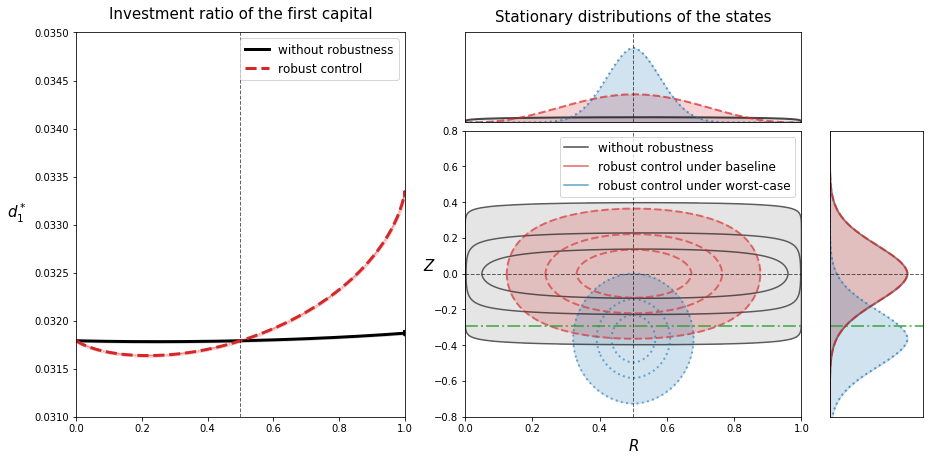

In [8]:
mm_sym.figure_1(left_top_ylim=[.031, .035], numb_lcurves=4)
plt.savefig(figures_path + '2cap_stationary_sym_HS.pdf')

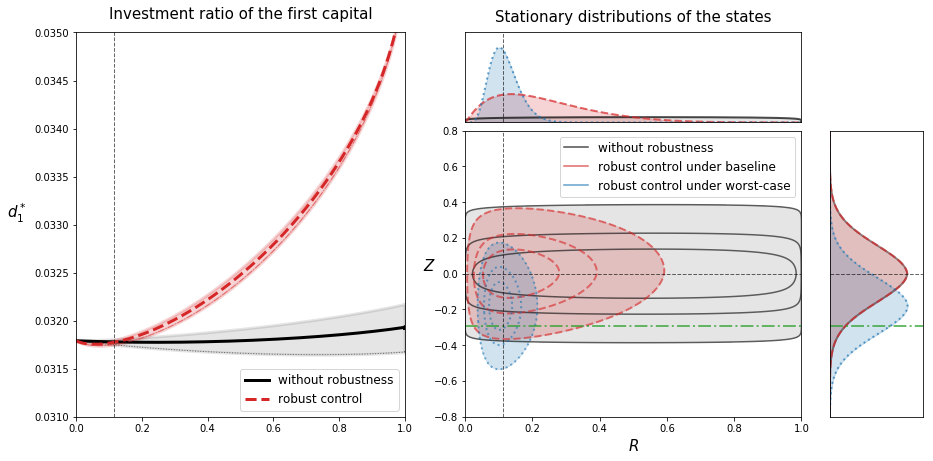

In [9]:
mm_asym.figure_1(left_top_ylim=[.031, .035], numb_lcurves=4)
plt.savefig(figures_path + '2cap_stationary_asym_HS.pdf')

In [10]:
np.exp(mm_asym.rr[mm_asym.ind_med_r, 0])/(1+np.exp(mm_asym.rr[mm_asym.ind_med_r, 0]))

0.11405238127979087

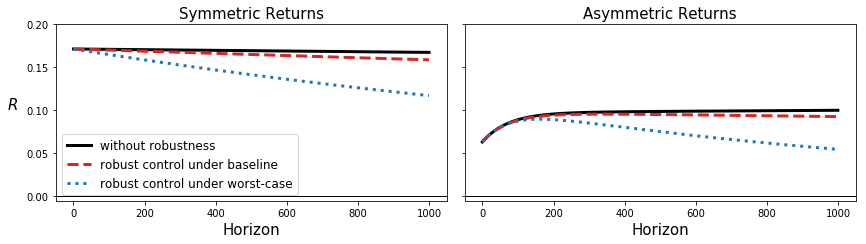

In [19]:
model = mm_sym_p
shock = 0
dim = 'R'

if dim=='R':
    dec1 = 1
    dec9 = 2
elif dim=='Z':
    dec1 = 3
    dec9 = 4

fig, ax = plt.subplots(1, 2, figsize=(12, 3.5), sharey=True) #, sharex=True)

ax[0].plot(100*model.R_irf[:, 2, shock, 0], lw=3, color='k', label='without robustness')
#ax[0].plot(100*model.R_irf[:, 2, shock, dec9], lw=1, color='k', linestyle='-.', alpha=.8)
#ax[0].fill_between(np.arange(model.T), 100*model.R_irf[:, 2, shock, dec1], 100*model.R_irf[:, 2, shock, 0], 
#                        color='k', alpha=.1)
#ax[0].fill_between(np.arange(model.T), 100*model.R_irf[:, 2, shock, 0], 100*model.R_irf[:, 2, shock, dec9], 
#                        color='k', alpha=.1)
ax[0].plot(100*model.R_irf[:, 0, shock, 0], lw=3, color=colors[3], linestyle='--', 
           label='robust control under baseline')
#ax[0].plot(100*model.R_irf[:, 0, shock, dec9], lw=1, color=colors[3], linestyle='-.', alpha=.8)
#ax[0].fill_between(np.arange(model.T), 100*model.R_irf[:, 0, shock, dec1], 100*model.R_irf[:, 0, shock, 0], 
#                       color=colors[3], alpha=.1)
#ax[0].fill_between(np.arange(model.T), 100*model.R_irf[:, 0, shock, 0], 100*model.R_irf[:, 0, shock, dec9], 
#                       color=colors[3], alpha=.1)
ax[0].plot(100*model.R_irf[:, 1, shock, 0], lw=3, color=colors[0],  linestyle=':', 
           label='robust control under worst-case')
#ax[0].plot(100*model.R_irf[:, 1, shock, dec9], lw=1, color=colors[0], linestyle='-.', alpha=.8)
#ax[0].fill_between(np.arange(model.T), 100*model.R_irf[:, 1, shock, dec1], 100*model.R_irf[:, 1, shock, 0], 
#                       color=colors[0], alpha=.1)
#ax[0].fill_between(np.arange(model.T), 100*model.R_irf[:, 1, shock, 0], 100*model.R_irf[:, 1, shock, dec9], 
#                       color=colors[0], alpha=.1)
ax[0].axhline(0, color='k', lw=1)
ax[0].set_title("Symmetric Returns", fontsize=15)
ax[0].set_ylabel(r'$R$', fontsize=15, rotation=0)
ax[0].yaxis.set_label_coords(-0.11, .5)
#ax[0].set_ylim([-.005, .27])
ax[0].legend(loc='best', fontsize=12)
ax[0].set_xlabel("Horizon", fontsize=15)

model = mm_asym_p

ax[1].plot(100*model.R_irf[:, 2, shock, 0], lw=3, color='k', label='without robustness')
#ax[1].plot(100*model.R_irf[:, 2, shock, dec9], lw=1, color='k', linestyle='-.', alpha=.8)
#ax[1].fill_between(np.arange(model.T), 100*model.R_irf[:, 2, shock, dec1], 100*model.R_irf[:, 2, shock, 0], 
#                        color='k', alpha=.1)
#ax[1].fill_between(np.arange(model.T), 100*model.R_irf[:, 2, shock, 0], 100*model.R_irf[:, 2, shock, dec9], 
#                        color='k', alpha=.1)
ax[1].plot(100*model.R_irf[:, 0, shock, 0], lw=3, color=colors[3],  linestyle='--', 
           label='robust control under baseline')
#ax[1].plot(100*model.R_irf[:, 0, shock, dec9], lw=1, color=colors[3], linestyle='-.', alpha=.8)
#ax[1].fill_between(np.arange(model.T), 100*model.R_irf[:, 0, shock, dec1], 100*model.R_irf[:, 0, shock, 0], 
#                       color=colors[3], alpha=.1)
#ax[1].fill_between(np.arange(model.T), 100*model.R_irf[:, 0, shock, 0], 100*model.R_irf[:, 0, shock, dec9], 
#                       color=colors[3], alpha=.1)
ax[1].plot(100*model.R_irf[:, 1, shock, 0], lw=3, color=colors[0],  linestyle=':',
           label='robust control under worst-case')
#ax[1].plot(100*model.R_irf[:, 1, shock, dec9], lw=1, color=colors[0], linestyle='-.', alpha=.8)
#ax[1].fill_between(np.arange(model.T), 100*model.R_irf[:, 1, shock, dec1], 100*model.R_irf[:, 1, shock, 0], 
#                       color=colors[0], alpha=.1)
#ax[1].fill_between(np.arange(model.T), 100*model.R_irf[:, 1, shock, 0], 100*model.R_irf[:, 1, shock, dec9], 
#                       color=colors[0], alpha=.1)
ax[1].axhline(0, color='k', lw=1)
ax[1].set_title("Asymmetric Returns", fontsize=15)
ax[1].set_ylim([-.005, .2]) #.3])
#ax[1].legend(loc='best')
ax[1].set_xlabel("Horizon", fontsize=15)

plt.tight_layout()
plt.savefig(figures_path + '2cap_irfR_k2_HS.pdf')

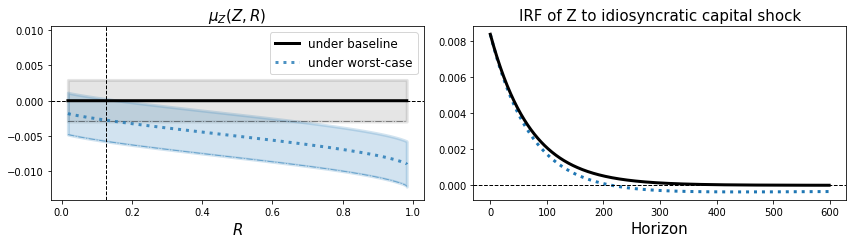

In [11]:
model = mm_asym_p

ind_ld_z, ind_med_z, ind_ud_z = model.ind_ld_z, model.ind_med_z, model.ind_ud_z    
ind_ld_r, ind_med_r, ind_ud_r = model.ind_ld_r, model.ind_med_r, model.ind_ud_r    

pii, rr, zz = model.pii, model.rr, model.zz    
mu_pii_noR, mu_pii, mu_pii_wc = model.mu_pii_noR, model.mu_pii, model.mu_pii_wc
mu_z, mu_z_wc = model.mu_z, model.mu_z_wc

#inn_r = slice(model.ind_ld_r_noR, model.ind_ud_r_noR)
inn_r = slice(1, -1)
fig, ax = plt.subplots(1, 2, figsize=(12, 3.5))

ax[0].plot(pii[inn_r, 0], mu_z[inn_r, model.ind_med_z], color='k', lw=3, label="under baseline")
#ax[0].plot(pii[inn_r, 0], mu_z[inn_r, model.ind_ld_z], color='k', lw=2, linestyle='--', alpha=.4)
ax[0].plot(pii[inn_r, 0], mu_z[inn_r, model.ind_ud_z], color='k', lw=1, linestyle='-.', alpha=.4)
ax[0].fill_between(pii[inn_r, 0], mu_z[inn_r, ind_ld_z], mu_z[inn_r, ind_ud_z], 
                              color='k', alpha=.1, lw=3)
ax[0].plot(pii[inn_r, 0], mu_z_wc[inn_r, ind_med_z], color=colors[0], alpha=.8, lw=3, linestyle=':', 
                 label="under worst-case")
#ax[0].plot(pii[inn_r, 0], mu_z_wc[inn_r, ind_ld_z], color=colors[0], linestyle='--', lw=2, alpha=.5)
ax[0].plot(pii[inn_r, 0], mu_z_wc[inn_r, ind_ud_z], color=colors[0], linestyle='-.', lw=1, alpha=.5)
ax[0].fill_between(pii[inn_r, 0], mu_z_wc[inn_r, ind_ld_z], mu_z_wc[inn_r, ind_ud_z], 
                              color=colors[0], alpha=.2, lw=3)
ax[0].axhline(0, color='k', lw=1, linestyle='--')
ax[0].axvline(pii[ind_med_r, 0], color='k', lw=1, linestyle='--')
ax[0].set_title(r'$\mu_Z(Z, R)$', fontsize=15) 
ax[0].set_xlabel(r'$R$', fontsize=15)
ax[0].set_ylim([-.014, .0105])
ax[0].legend(loc='best', fontsize=12)

shock=0

ax[1].plot(model.Z_irf[:600, 1, shock, 0], lw=3, color=colors[0], linestyle=':')
ax[1].plot(model.Z_irf[:600, 2, shock, 0], lw=3, color='k')
ax[1].axhline(0, color='k', lw=1, linestyle='--')
ax[1].set_title("IRF of Z to idiosyncratic capital shock", fontsize=15)
ax[1].set_xlabel("Horizon", fontsize=15)
#ax[1].set_ylim([-.001, .01])
plt.tight_layout()

plt.savefig(figures_path + '2cap_asymZ_k2_HS.pdf')

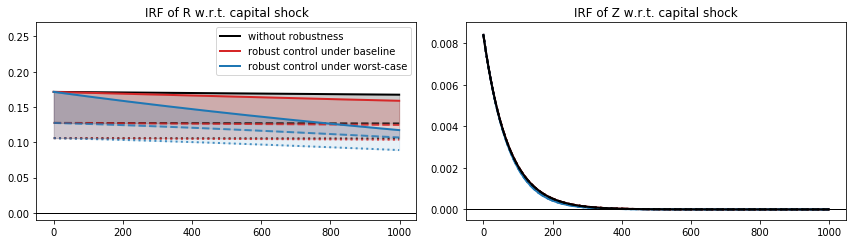

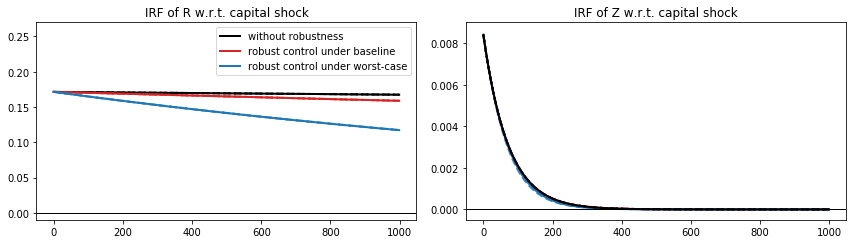

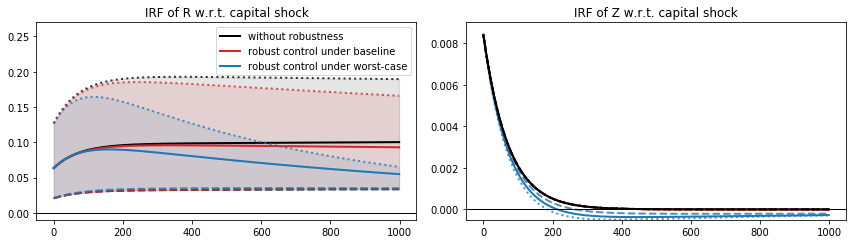

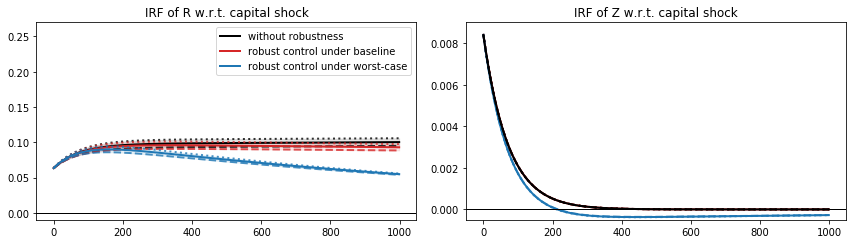

In [17]:
irf_figure1(mm_sym_p, 0, 'R', [-.01, .27], [-.0005, .009])
irf_figure1(mm_sym_p, 0, 'Z', [-.01, .27], [-.0005, .009])
irf_figure1(mm_asym_p, 0, 'R', [-.01, .27], [-.0005, .009])
irf_figure1(mm_asym_p, 0, 'Z', [-.01, .27], [-.0005, .009])

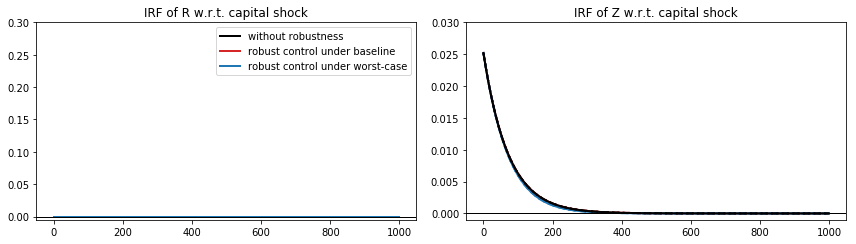

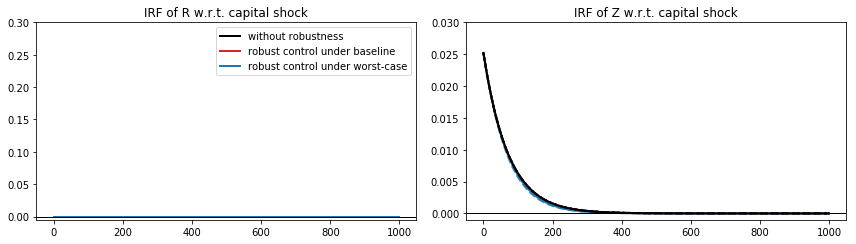

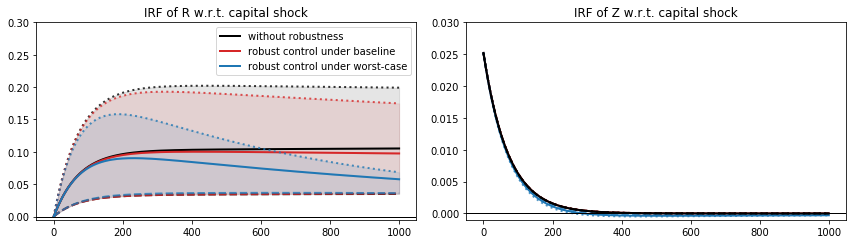

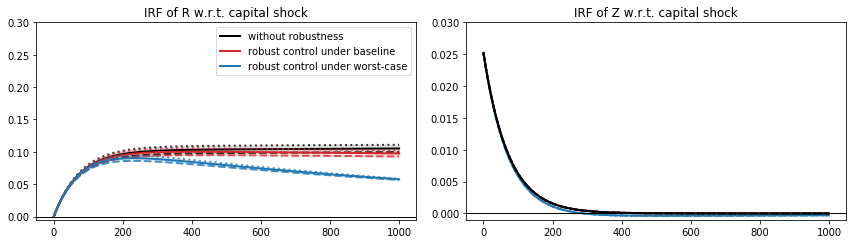

In [19]:
irf_figure1(mm_sym_p, 1, 'R', [-.005, .3], [-.001, .03])
irf_figure1(mm_sym_p, 1, 'Z', [-.005, .3], [-.001, .03])
irf_figure1(mm_asym_p, 1, 'R', [-.005, .3], [-.001, .03])
irf_figure1(mm_asym_p, 1, 'Z', [-.005, .3], [-.001, .03])

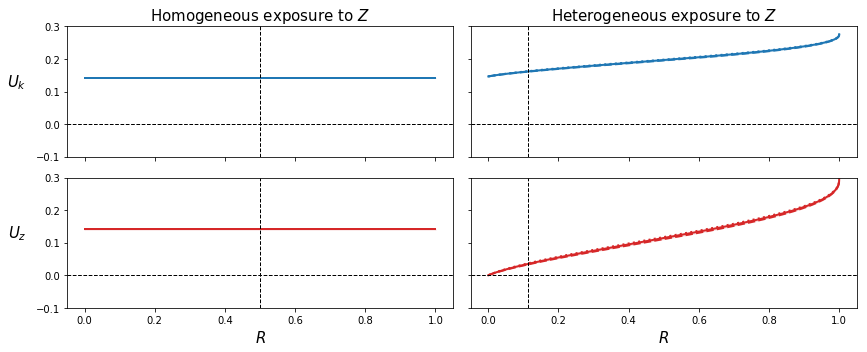

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5), sharey=True)
mm_sym.figure_U(ax[0, 0], ax[1, 0], ylim=[-.1, .3])  #, ylim_top=[.09, .2])
mm_asym.figure_U(ax[0, 1], ax[1, 1])                #, ylim=[.02, .2], ylim_top=[.09, .2])
ax[0, 0].set_ylabel(r'$U_k$', fontsize=15, rotation=0)
ax[1, 0].set_ylabel(r'$U_z$', fontsize=15, rotation=0)
ax[0, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[1, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[0, 0].axhline(0, lw=1, color='k', linestyle='--')
ax[0, 1].axhline(0, lw=1, color='k', linestyle='--')
ax[1, 0].axhline(0, lw=1, color='k', linestyle='--')

ax[0, 0].set_title(r"Homogeneous exposure to $Z$", fontsize=15)
ax[0, 1].set_title(r"Heterogeneous exposure to $Z$", fontsize=15)
ax[1, 1].axhline(0, lw=1, color='k', linestyle='--')
plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)

plt.tight_layout()

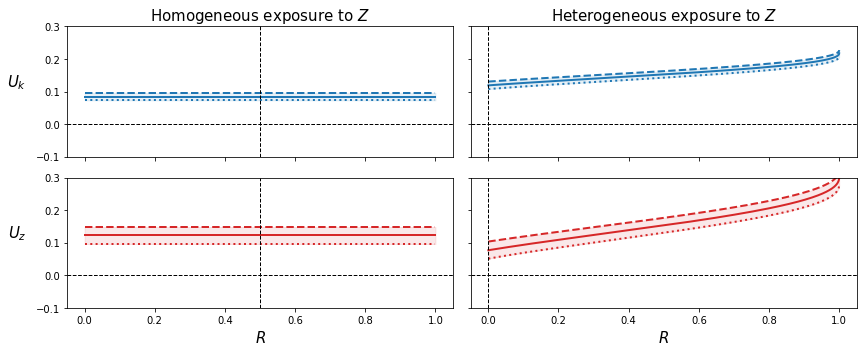

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5), sharey=True)
mm_sym_HSHS.figure_U(ax[0, 0], ax[1, 0], ylim=[-.1, .3])  #, ylim_top=[.09, .2])
mm_asym_HSHS.figure_U(ax[0, 1], ax[1, 1])                #, ylim=[.02, .2], ylim_top=[.09, .2])
ax[0, 0].set_ylabel(r'$U_k$', fontsize=15, rotation=0)
ax[1, 0].set_ylabel(r'$U_z$', fontsize=15, rotation=0)
ax[0, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[1, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[0, 0].axhline(0, lw=1, color='k', linestyle='--')
ax[0, 1].axhline(0, lw=1, color='k', linestyle='--')
ax[1, 0].axhline(0, lw=1, color='k', linestyle='--')

ax[0, 0].set_title(r"Homogeneous exposure to $Z$", fontsize=15)
ax[0, 1].set_title(r"Heterogeneous exposure to $Z$", fontsize=15)
ax[1, 1].axhline(0, lw=1, color='k', linestyle='--')
plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)

plt.tight_layout()

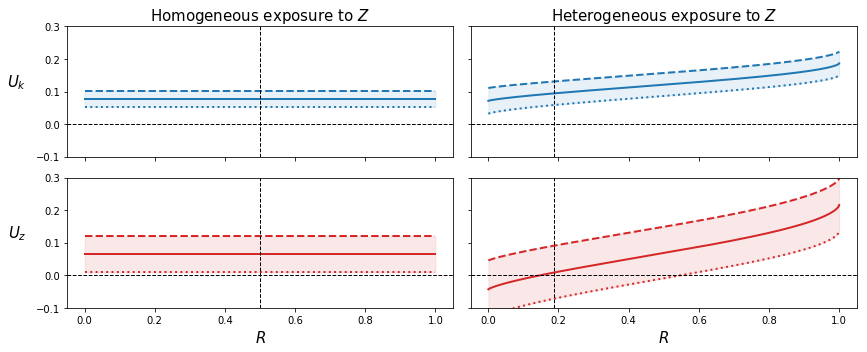

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5), sharey=True)
mm_sym_HSHS2.figure_U(ax[0, 0], ax[1, 0], ylim=[-.1, .3])  #, ylim_top=[.09, .2])
mm_asym_HSHS2.figure_U(ax[0, 1], ax[1, 1])                #, ylim=[.02, .2], ylim_top=[.09, .2])
ax[0, 0].set_ylabel(r'$U_k$', fontsize=15, rotation=0)
ax[1, 0].set_ylabel(r'$U_z$', fontsize=15, rotation=0)
ax[0, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[1, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[0, 0].axhline(0, lw=1, color='k', linestyle='--')
ax[0, 1].axhline(0, lw=1, color='k', linestyle='--')
ax[1, 0].axhline(0, lw=1, color='k', linestyle='--')

ax[0, 0].set_title(r"Homogeneous exposure to $Z$", fontsize=15)
ax[0, 1].set_title(r"Heterogeneous exposure to $Z$", fontsize=15)
ax[1, 1].axhline(0, lw=1, color='k', linestyle='--')
plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)

plt.tight_layout()

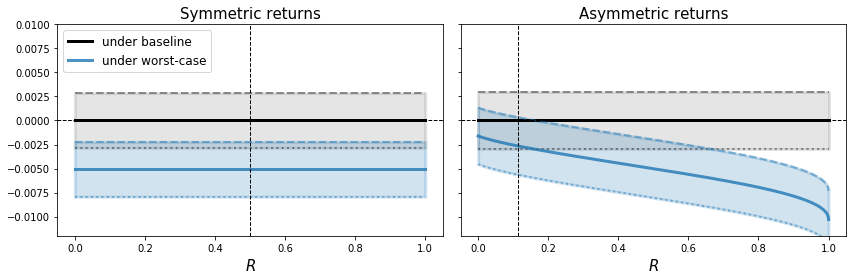

In [22]:
fig_muZ(mm_sym, mm_asym)

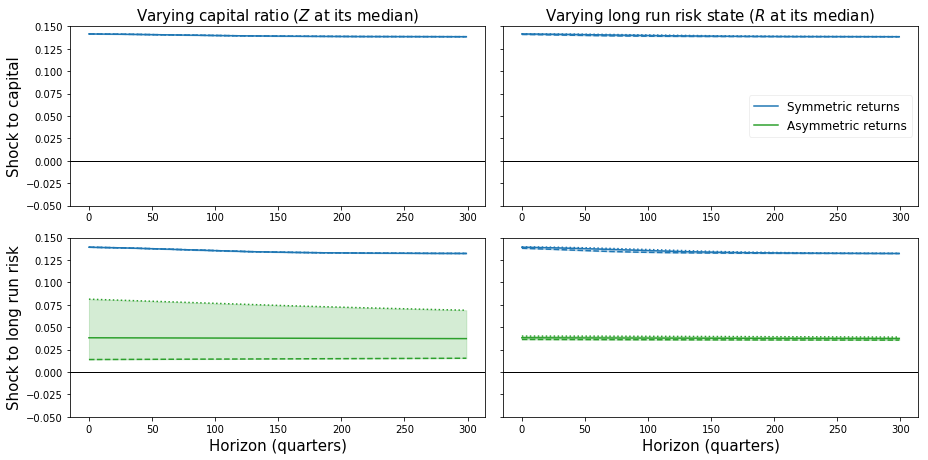

In [23]:
plot_termstructure(mm_sym_p, mm_asym_p, 300)

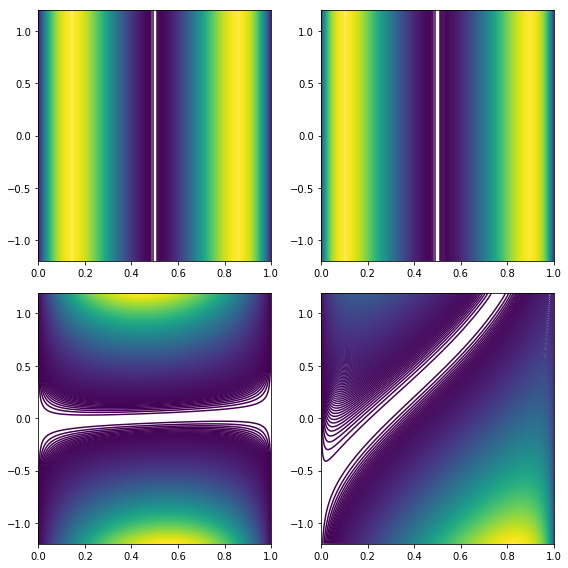

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

model = mm_sym
ax[0, 0].contour(model.pii, model.zz, model.cons_noR, 600)
ax[0, 1].contour(model.pii, model.zz, model.cons, 600)

model = mm_asym
ax[1, 0].contour(model.pii, model.zz, model.cons_noR, 600)
ax[1, 1].contour(model.pii, model.zz, model.cons, 600)

plt.tight_layout()

--------------------------------------------------
# Parameter Uncertainty

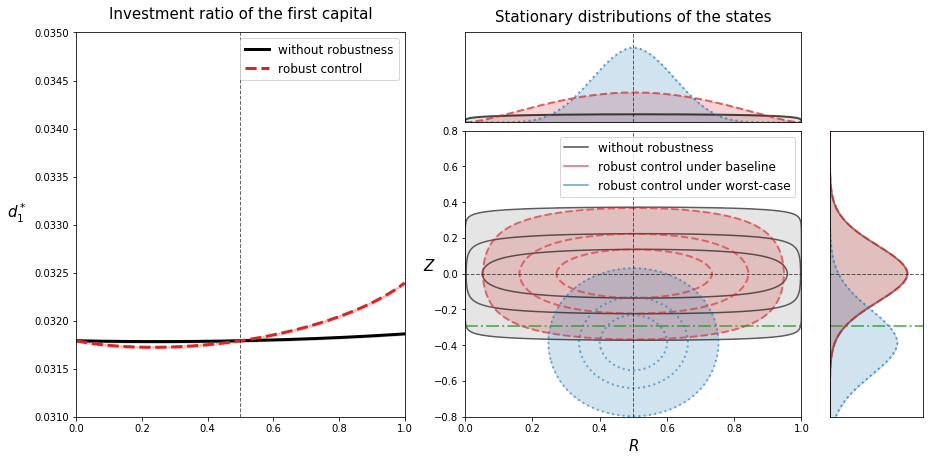

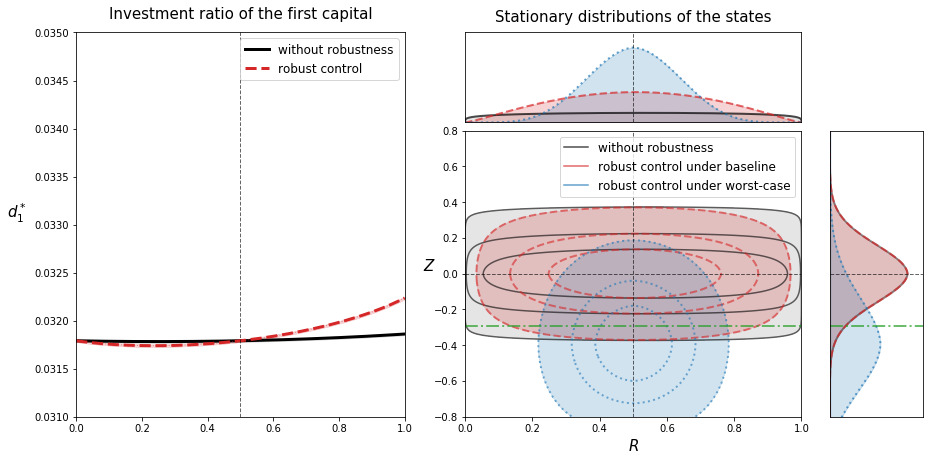

In [24]:
mm_sym_HSHS.figure_1(left_top_ylim=[.031, .035], numb_lcurves=4)
mm_sym_HSHS2.figure_1(left_top_ylim=[.031, .035], numb_lcurves=4)

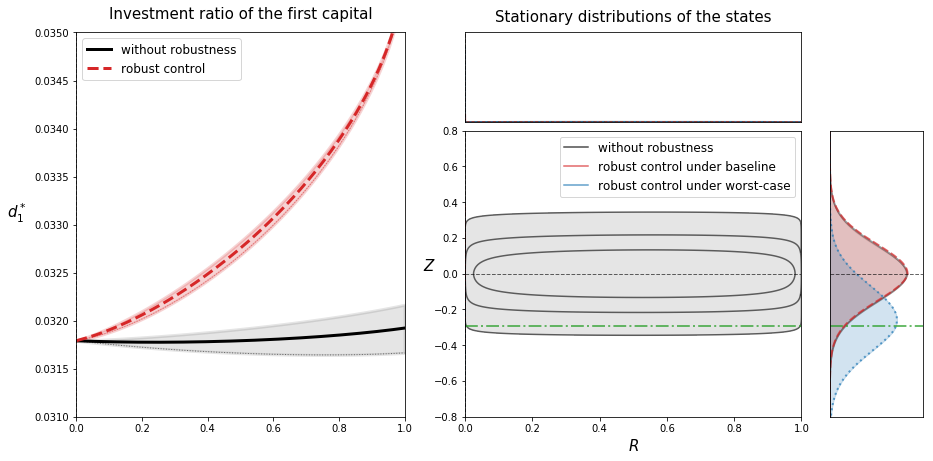

In [25]:
mm_asym_HSHS.figure_1(left_top_ylim=[.031, .035], numb_lcurves=4)
#mm_asym_HSHS2.figure_1(left_top_ylim=[.001, .008], 
#                left_bottom_ylim=[-.1, .1])

In [26]:
irf_figure1(mm_sym_HSHS_p, 0, 'R', [-.01, .2], [-.0005, .009])
irf_figure1(mm_sym_HSHS_p, 0, 'Z', [-.01, .2], [-.0005, .009])
irf_figure1(mm_asym_HSHS_p, 0, 'R', [-.01, .1], [-.0005, .009])
irf_figure1(mm_asym_HSHS_p, 0, 'Z', [-.01, .1], [-.0005, .009])

NameError: name 'mm_sym_HSHS_p' is not defined

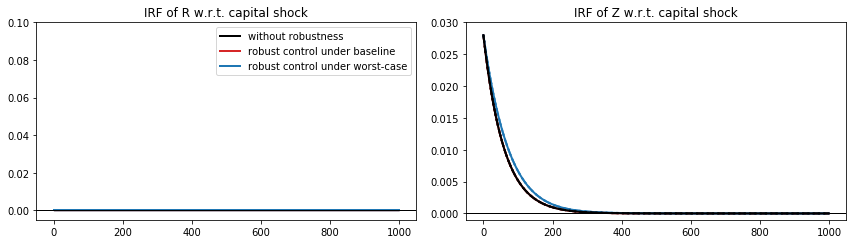

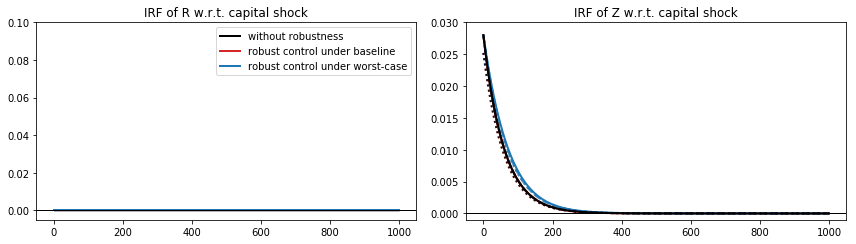

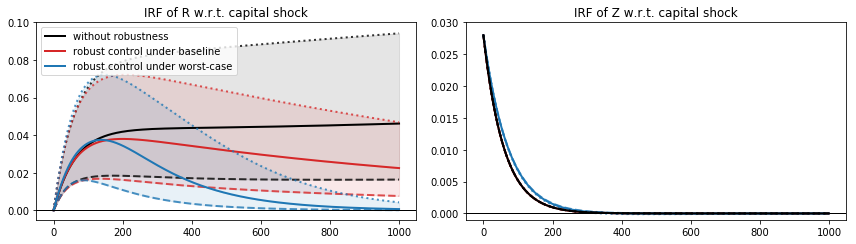

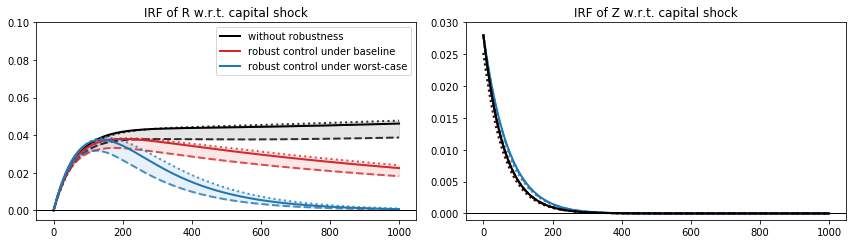

In [24]:
irf_figure1(mm_sym_HSHS_p, 1, 'R', [-.005, .1], [-.001, .03])
irf_figure1(mm_sym_HSHS_p, 1, 'Z', [-.005, .1], [-.001, .03])
irf_figure1(mm_asym_HSHS_p, 1, 'R', [-.005, .1], [-.001, .03])
irf_figure1(mm_asym_HSHS_p, 1, 'Z', [-.005, .1], [-.001, .03])

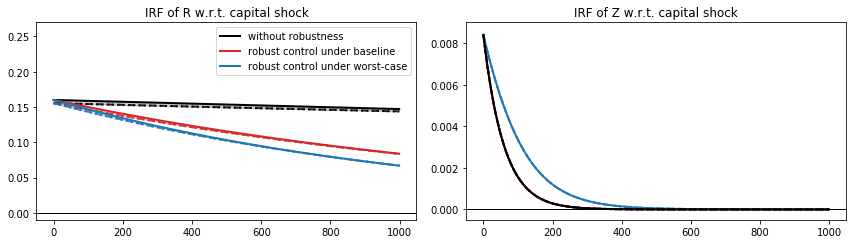

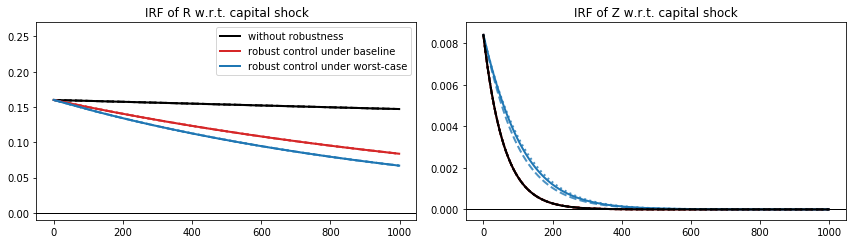

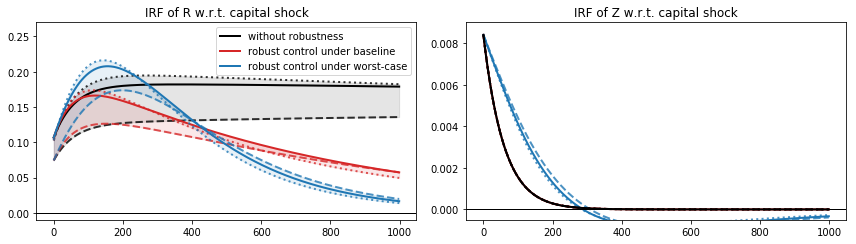

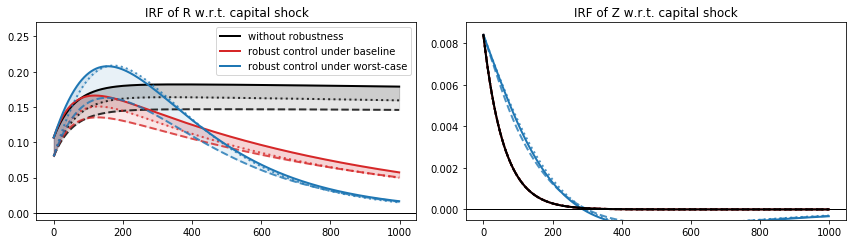

In [25]:
irf_figure1(mm_sym_HSHS2_p, 0, 'R', [-.01, .27], [-.0005, .009])
irf_figure1(mm_sym_HSHS2_p, 0, 'Z', [-.01, .27], [-.0005, .009])
irf_figure1(mm_asym_HSHS2_p, 0, 'R', [-.01, .27], [-.0005, .009])
irf_figure1(mm_asym_HSHS2_p, 0, 'Z', [-.01, .27], [-.0005, .009])

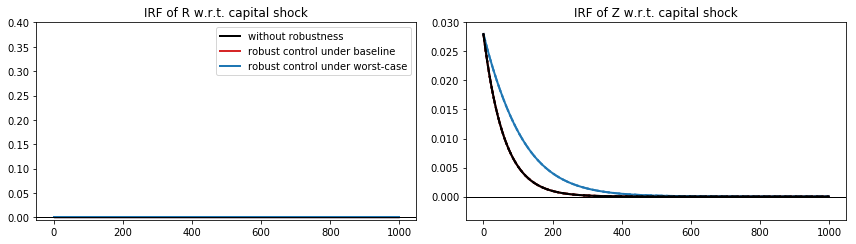

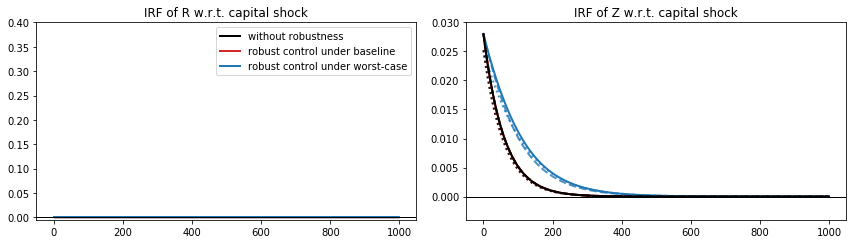

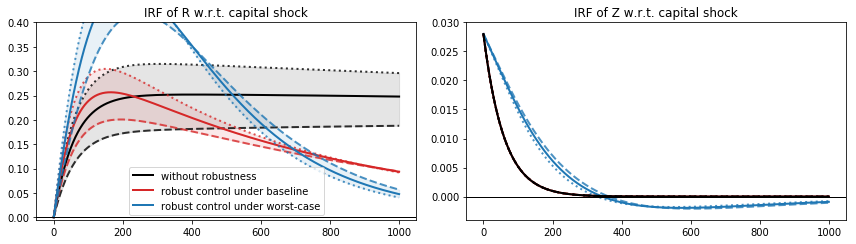

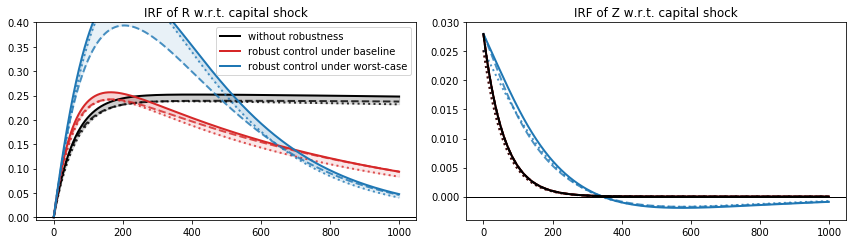

In [26]:
irf_figure1(mm_sym_HSHS2_p, 1, 'R', [-.005, .4], [-.004, .03])
irf_figure1(mm_sym_HSHS2_p, 1, 'Z', [-.005, .4], [-.004, .03])
irf_figure1(mm_asym_HSHS2_p, 1, 'R', [-.005, .4], [-.004, .03])
irf_figure1(mm_asym_HSHS2_p, 1, 'Z', [-.005, .4], [-.004, .03])

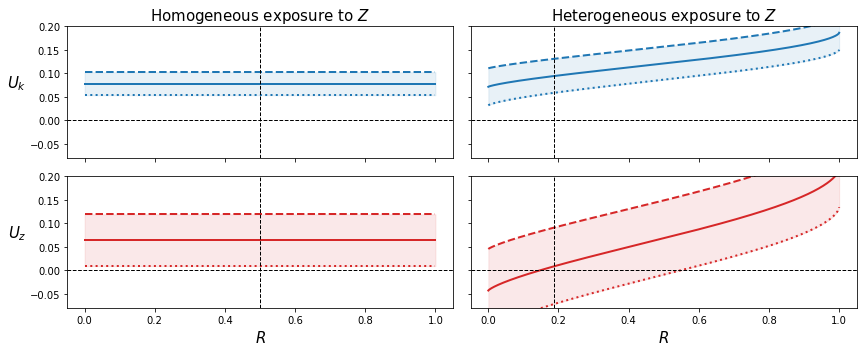

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5), sharey=True)
mm_sym_HSHS2.figure_U(ax[0, 0], ax[1, 0], ylim=[-.08, .2])#, ylim_top=[.09, .2])
mm_asym_HSHS2.figure_U(ax[0, 1], ax[1, 1])#, ylim=[.02, .2], ylim_top=[.09, .2])
ax[0, 0].set_ylabel(r'$U_k$', fontsize=15, rotation=0)
ax[1, 0].set_ylabel(r'$U_z$', fontsize=15, rotation=0)
ax[0, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[1, 0].yaxis.set_label_coords(-0.13, 0.5)
ax[0, 0].axhline(0, lw=1, color='k', linestyle='--')
ax[0, 1].axhline(0, lw=1, color='k', linestyle='--')
ax[1, 0].axhline(0, lw=1, color='k', linestyle='--')


ax[0, 0].set_title(r"Homogeneous exposure to $Z$", fontsize=15)
ax[0, 1].set_title(r"Heterogeneous exposure to $Z$", fontsize=15)
ax[1, 1].axhline(0, lw=1, color='k', linestyle='--')
plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)

plt.tight_layout()

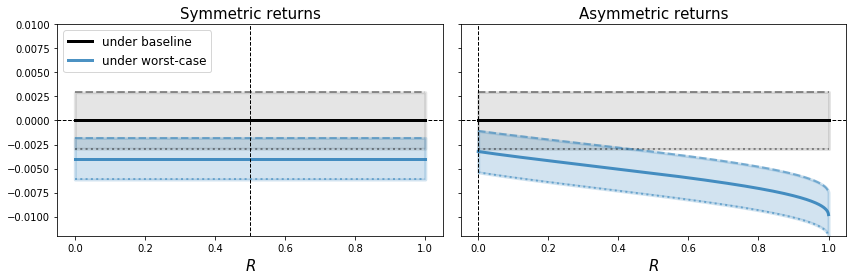

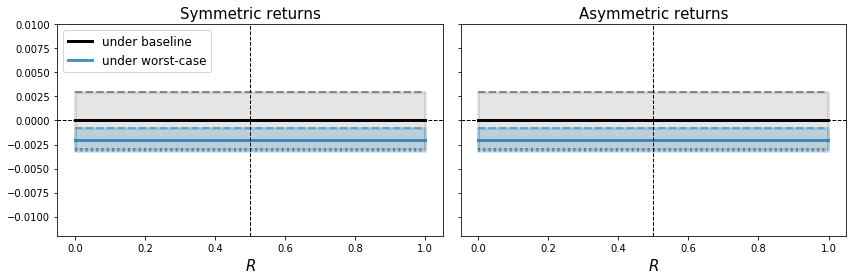

In [7]:
fig_muZ(mm_sym_HSHS, mm_asym_HSHS)
fig_muZ(mm_sym_HSHS2, mm_sym_HSHS2)

In [18]:
model_sym_HSHS_p = np.load(result_files + "model_sym_HSHS_p.npz")
mm_sym_HSHS_p = Model(model_sym_HSHS_p)


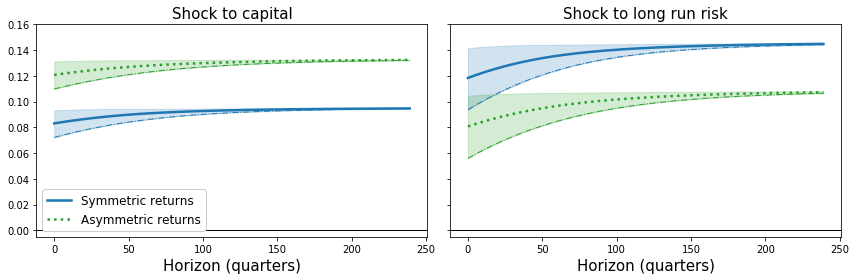

In [4]:
plot_termstructure2(mm_sym_HSHS_p, mm_asym_HSHS_p, 240)
plt.savefig(figures_path + '2cap_uncertaintyprice_hor.pdf')

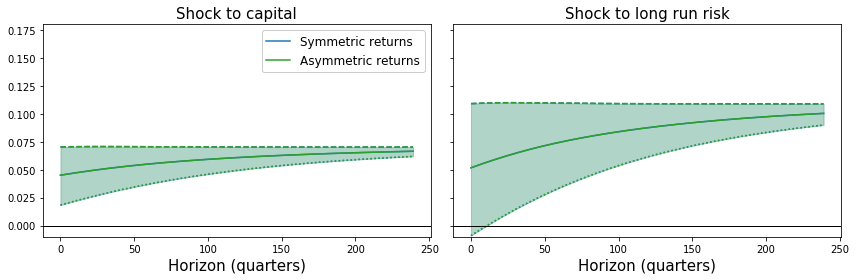

In [24]:
plot_termstructure2(mm_sym_HSHS2_p, mm_sym_HSHS2_p, 240)
#plt.savefig(figures_path + '2cap_uncertaintyprice_hor.pdf')

---------------------------------
## Figures for Pricing section

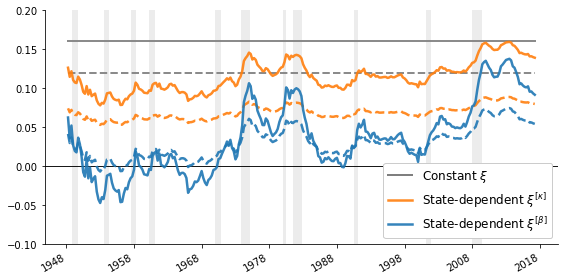

In [31]:
#-----------------------------------
# Unstructured uncertainty prices
#-----------------------------------
uncertainty_prices   = np.ones((z_path.shape[1], 1)) @ -model_1cap[3, 17:19].reshape(1, 2)

#-----------------------------------
# Structured uncertainty prices
#-----------------------------------
H_0_k, H_1_k = model_1cap[-5, 17:19].reshape(2, 1), model_1cap[-5, 19:21].reshape(2, 1)
H_0_b, H_1_b = model_1cap[-1, 17:19].reshape(2, 1), model_1cap[-1, 19:21].reshape(2, 1)


uncertainty_prices_k = -(H_0_k + H_1_k @ z_path)
uncertainty_prices_b = -(H_0_b + H_1_b @ z_path)

UP = pd.DataFrame(data=np.hstack([uncertainty_prices, 
                                  uncertainty_prices_k.T, 
                                  uncertainty_prices_b.T, 
                                  states.values]), 
                  index=pd.date_range(states.index[0], states.index[-1], freq='Q'), 
                  columns=['price_1_u', 'price_2_u', 'price_1_k', 'price_2_k', 'price_1_b', 'price_2_b', 
                           'cons_growth', 'exp_cons_growth', 'filtered_state'])

#=================================
# PLOT
#=================================
start_date = '1948-01-31'

import matplotlib.lines as mlines

fig, ax = plt.subplots(figsize=(8, 4))
sns.despine()

ax.axhline(0, lw=1, color='k', alpha=.9)
#plt.axhline(uncertainty_prices_unstructured[0], color=colors[7], linestyle='--', lw=2)
#plt.axhline(uncertainty_prices_unstructured[1], color=colors[7], lw=2)
UP['price_1_u'].plot(ax=ax, lw=2, linestyle='--', color=colors[7], alpha=.9)
UP['price_2_u'].plot(ax=ax, lw=2, color=colors[7], alpha=.9)
UP['price_1_k'].plot(ax=ax, lw=2.5, linestyle='--', color=colors[1], alpha=.9)
UP['price_2_k'].plot(ax=ax, lw=2.5, color=colors[1], alpha=.9)
UP['price_1_b'].plot(ax=ax, lw=2.5, color=colors[0], linestyle='--', alpha=.9)
UP['price_2_b'].plot(ax=ax, lw=2.5, color=colors[0], alpha=.9)


line1 = mlines.Line2D([], [], color=colors[7], lw=2)
line2 = mlines.Line2D([], [], color=colors[1], lw=2.5, alpha=.9)
line3 = mlines.Line2D([], [], color=colors[0], lw=2.5, alpha=.9)

ax.legend([line1, line2, line3], 
          [r'Constant $\xi$', r'State-dependent $\xi^{[\kappa]}$', r'State-dependent $\xi^{[\beta]}$'], 
          loc='best', fontsize = 12, frameon=True, framealpha=1.0)

ax.tick_params(axis='both', which='major', labelsize = 10)
ax.set_ylim([-0.1, .2])

NBER_Shade(ax, start_date)
plt.tight_layout()
plt.savefig(figures_path + 'uncertainty_prices.pdf')

--------------------------------------
## Load in models with structured uncertainty

In [5]:
def stationary_uncertaintyprice2(density, vec, I):

    length = density.shape[0]
    segment = I - 0
    numb_segment = int(round(length/segment))

    price = np.zeros(numb_segment)
    price_density = np.zeros(numb_segment)

    for i in range(numb_segment):
        price_density[i] = max(density[i*segment:(i+1)*segment])
        dummy = vec[i*segment:(i+1)*segment]
        price[i] = dummy[np.argmax(density[i*segment:(i+1)*segment])]

    return price, price_density


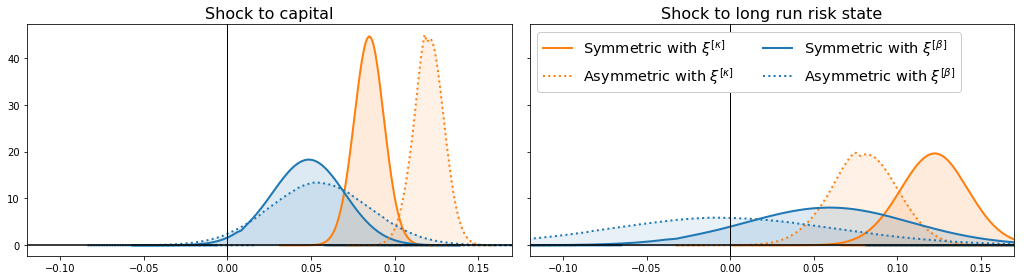

In [7]:
m1 = mm_sym_HSHS
m2 = mm_asym_HSHS

m1_b = mm_sym_HSHS2
m2_b = mm_asym_HSHS2

# Single capital economy
stdev_z_1cap = m1.stdev_z_1cap
x = np.linspace(.05, .35, 1000)
#h1_cap1 = norm(loc= -H_0[0], scale = H_1[0] * stdev_z_1cap)
#hz_cap1 = norm(loc= -H_0[1], scale = H_1[1] * stdev_z_1cap)

# Symmetric capital stocks
h12_vec, h12_density = stationary_uncertaintyprice2(m1.h12_density, m1.h12_vec, m1.I)
hz_vec, hz_density = stationary_uncertaintyprice2(m1.hz_density, m1.hz_vec, m1.I)

h12_b_vec, h12_b_density = stationary_uncertaintyprice2(m1_b.h12_density, m1_b.h12_vec, m1_b.I)
hz_b_vec, hz_b_density = stationary_uncertaintyprice2(m1_b.hz_density, m1_b.hz_vec, m1_b.I)

h12_asym_vec, h12_asym_density = stationary_uncertaintyprice2(m2.h12_density, m2.h12_vec, m2.I)
hz_asym_vec, hz_asym_density = stationary_uncertaintyprice2(m2.hz_density, m2.hz_vec, m2.I)

h12_asym_b_vec, h12_asym_b_density = stationary_uncertaintyprice2(m2_b.h12_density, m2_b.h12_vec, m2_b.I)
hz_asym_b_vec, hz_asym_b_density = stationary_uncertaintyprice2(m2_b.hz_density, m2_b.hz_vec, m2_b.I)

hz_sum = np.sum(h12_density[:-1] * abs(h12_vec[1:]-h12_vec[:-1]))
hz_asym_sum = np.sum(h12_asym_density[:-1] * abs(h12_asym_vec[1:]-h12_asym_vec[:-1]))

hz_b_sum = np.sum(h12_b_density[:-1] * abs(h12_b_vec[1:]-h12_b_vec[:-1]))
hz_asym_b_sum = np.sum(h12_asym_b_density[:-1] * abs(h12_asym_b_vec[1:]-h12_asym_b_vec[:-1]))

#=============== PLOT =========================#

fig, ax = plt.subplots(1, 2, figsize = (15, 4), sharex=True, sharey=True)

ax[0].set_title("Shock to capital", fontsize=16)
ax[0].plot(h12_vec, h12_density/hz_sum, lw=2, color=colors[1], 
           label=r"Symmetric (concern about $\kappa$)")
ax[0].fill_between(h12_vec, 0, h12_density/hz_sum, color=colors[1], alpha=.15)
ax[0].plot(h12_b_vec, h12_b_density/hz_b_sum, lw=2, color=colors[0], 
           label=r"Symmetric returns with $\xi^{[\beta]}$")
ax[0].plot(h12_asym_vec, h12_asym_density/hz_asym_sum, lw=2, color=colors[1], linestyle=':', 
           label=r'Asymmetric (concern about $\kappa$)')
ax[0].fill_between(h12_asym_vec, 0, h12_asym_density/hz_asym_sum, color=colors[1], alpha=.1)
ax[0].plot(h12_asym_b_vec, h12_asym_b_density/hz_asym_b_sum, lw=2, color=colors[0], linestyle=':',
           label=r'Asymmetric (concern about $\beta$)')
ax[0].fill_between(h12_asym_b_vec, 0, h12_asym_b_density/hz_asym_b_sum, color=colors[0], alpha=.1)
ax[0].fill_between(h12_b_vec, 0, h12_b_density/hz_b_sum, color=colors[0], alpha=.15)
ax[0].axhline(0, lw=1.5, color='k')
ax[0].axvline(0, lw=1, color='k')

ax[1].set_title("Shock to long run risk state", fontsize=16)
ax[1].plot(hz_vec, hz_density/hz_sum, lw=2, color=colors[1], 
           label=r"Symmetric with $\xi^{[\kappa]}$")
ax[1].fill_between(hz_vec, 0, hz_density/hz_sum, color=colors[1], alpha=.15)
ax[1].plot(hz_asym_vec, hz_asym_density/hz_asym_sum, lw=2, color=colors[1], linestyle=':',
           label=r"Asymmetric with $\xi^{[\kappa]}$")
ax[1].fill_between(hz_asym_vec, 0, hz_asym_density/hz_asym_sum, color=colors[1], alpha=.1)
ax[1].plot(hz_b_vec, hz_b_density/hz_b_sum, lw=2, color=colors[0], 
           label=r"Symmetric with $\xi^{[\beta]}$")
ax[1].plot(hz_asym_b_vec, hz_asym_b_density/hz_asym_b_sum, lw=2, color=colors[0], linestyle=':',
           label=r"Asymmetric with $\xi^{[\beta]}$")
ax[1].fill_between(hz_asym_b_vec, 0, hz_asym_b_density/hz_asym_b_sum, color=colors[0], alpha=.1)
ax[1].fill_between(hz_b_vec, 0, hz_b_density/hz_b_sum, color=colors[0], alpha=.15)

ax[1].axhline(0, lw=1.5, color='k')
ax[1].legend(loc=2, fontsize=14.5, ncol=2, frameon=True, framealpha=1.0)
ax[1].set_xlim([-.12, .17])
ax[1].axvline(0, lw=1, color='k')

plt.tight_layout()
plt.savefig(figures_path + 'local_uncertainty_prices.pdf')

In [36]:
#print(np.sum(h1_cap1.pdf(x)[:-1] * abs(x[1:]-x[:-1])))
print(np.sum(h12_density[:-1] * abs(h12_vec[1:]-h12_vec[:-1])))
print(np.sum(hz_density[:-1] * abs(hz_vec[1:]-hz_vec[:-1])))
print(np.sum(h12_asym_density[:-1] * abs(h12_asym_vec[1:]-h12_asym_vec[:-1])))
print(np.sum(hz_asym_density[:-1] * abs(hz_asym_vec[1:]-hz_asym_vec[:-1])))

1.5315204081488831
1.5315204081488831
0.1799991151184534
0.17999911511845346


(0.0, 500.0)

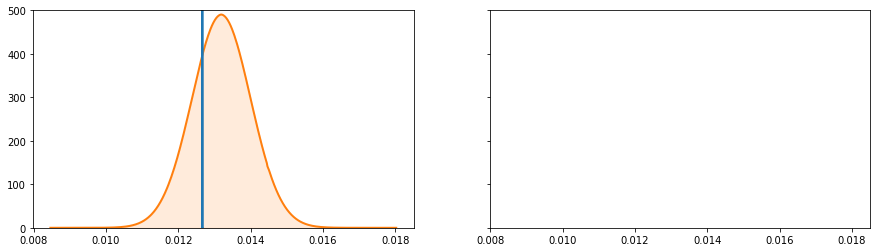

In [47]:
m1 = mm_sym
m2 = mm_asym

rf_vec, rf_density = stationary_uncertaintyprice2(m1.rf_density, m1.rf_vec, m1.I)
rf_sum = np.sum(rf_density[:-1] * abs(rf_vec[1:]-rf_vec[:-1]))

rf_asym_vec, rf_asym_density = stationary_uncertaintyprice2(m2.rf_density, m2.rf_vec, m2.I)
rf_asym_sum = np.sum(rf_asym_density[:-1] * abs(rf_asym_vec[1:]-rf_asym_vec[:-1]))


fig, ax = plt.subplots(1, 2, figsize = (15, 4), sharex=True, sharey=True)
ax[0].plot(rf_vec, rf_density/rf_sum, lw=2, color=colors[1], 
           label=r"Symmetric (concern about $\kappa$)")
ax[0].fill_between(rf_vec, 0, rf_density/rf_sum, color=colors[1], alpha=.15)

ax[0].plot(rf_asym_vec, rf_asym_density/rf_asym_sum, lw=2, color=colors[0], 
           label=r"Symmetric (concern about $\kappa$)")
ax[0].fill_between(rf_asym_vec, 0, rf_asym_density/rf_asym_sum, color=colors[0], alpha=.15)
ax[0].set_ylim([0., 500.])


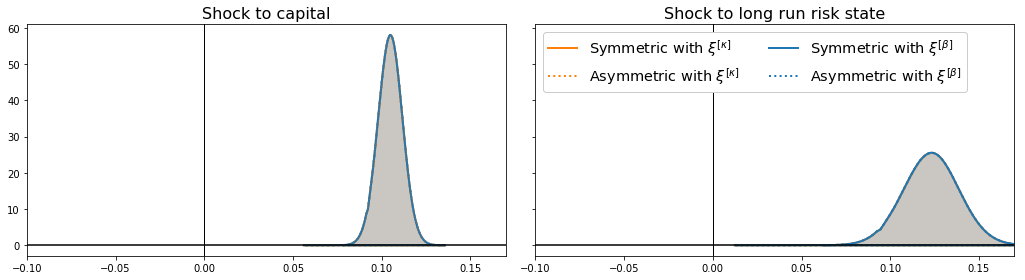

In [12]:
m1 = mm_sym_HSHS
m2 = mm_sym_HSHS

m1_b = mm_sym_HSHS
m2_b = mm_sym_HSHS

# Single capital economy
stdev_z_1cap = m1.stdev_z_1cap
x = np.linspace(.05, .35, 1000)
#h1_cap1 = norm(loc= -H_0[0], scale = H_1[0] * stdev_z_1cap)
#hz_cap1 = norm(loc= -H_0[1], scale = H_1[1] * stdev_z_1cap)

# Symmetric capital stocks
h12_vec, h12_density = stationary_uncertaintyprice2(m1.h12_density, m1.h12_vec, m1.I)
hz_vec, hz_density = stationary_uncertaintyprice2(m1.hz_density, m1.hz_vec, m1.I)

h12_b_vec, h12_b_density = stationary_uncertaintyprice2(m1_b.h12_density, m1_b.h12_vec, m1_b.I)
hz_b_vec, hz_b_density = stationary_uncertaintyprice2(m1_b.hz_density, m1_b.hz_vec, m1_b.I)

h12_asym_vec, h12_asym_density = stationary_uncertaintyprice2(m2.h12_density, m2.h12_vec, m2.I)
hz_asym_vec, hz_asym_density = stationary_uncertaintyprice2(m2.hz_density, m2.hz_vec, m2.I)

h12_asym_b_vec, h12_asym_b_density = stationary_uncertaintyprice2(m2_b.h12_density, m2_b.h12_vec, m2_b.I)
hz_asym_b_vec, hz_asym_b_density = stationary_uncertaintyprice2(m2_b.hz_density, m2_b.hz_vec, m2_b.I)

hz_sum = np.sum(h12_density[:-1] * abs(h12_vec[1:]-h12_vec[:-1]))
hz_asym_sum = np.sum(h12_asym_density[:-1] * abs(h12_asym_vec[1:]-h12_asym_vec[:-1]))

hz_b_sum = np.sum(h12_b_density[:-1] * abs(h12_b_vec[1:]-h12_b_vec[:-1]))
hz_asym_b_sum = np.sum(h12_asym_b_density[:-1] * abs(h12_asym_b_vec[1:]-h12_asym_b_vec[:-1]))

#=============== PLOT =========================#

fig, ax = plt.subplots(1, 2, figsize = (15, 4), sharex=True, sharey=True)

ax[0].set_title("Shock to capital", fontsize=16)
ax[0].plot(h12_vec, h12_density/hz_sum, lw=2, color=colors[1], 
           label=r"Symmetric (concern about $\kappa$)")
ax[0].fill_between(h12_vec, 0, h12_density/hz_sum, color=colors[1], alpha=.15)
ax[0].plot(h12_b_vec, h12_b_density/hz_b_sum, lw=2, color=colors[0], 
           label=r"Symmetric returns with $\xi^{[\beta]}$")
ax[0].plot(h12_asym_vec, h12_asym_density/hz_asym_sum, lw=2, color=colors[1], linestyle=':', 
           label=r'Asymmetric (concern about $\kappa$)')
ax[0].fill_between(h12_asym_vec, 0, h12_asym_density/hz_asym_sum, color=colors[1], alpha=.1)
ax[0].plot(h12_asym_b_vec, h12_asym_b_density/hz_asym_b_sum, lw=2, color=colors[0], linestyle=':',
           label=r'Asymmetric (concern about $\beta$)')
ax[0].fill_between(h12_asym_b_vec, 0, h12_asym_b_density/hz_asym_b_sum, color=colors[0], alpha=.1)
ax[0].fill_between(h12_b_vec, 0, h12_b_density/hz_b_sum, color=colors[0], alpha=.15)
ax[0].axhline(0, lw=1.5, color='k')
ax[0].axvline(0, lw=1, color='k')

ax[1].set_title("Shock to long run risk state", fontsize=16)
ax[1].plot(hz_vec, hz_density/hz_sum, lw=2, color=colors[1], 
           label=r"Symmetric with $\xi^{[\kappa]}$")
ax[1].fill_between(hz_vec, 0, hz_density/hz_sum, color=colors[1], alpha=.15)
ax[1].plot(hz_asym_vec, hz_asym_density/hz_asym_sum, lw=2, color=colors[1], linestyle=':',
           label=r"Asymmetric with $\xi^{[\kappa]}$")
ax[1].fill_between(hz_asym_vec, 0, hz_asym_density/hz_asym_sum, color=colors[1], alpha=.1)
ax[1].plot(hz_b_vec, hz_b_density/hz_b_sum, lw=2, color=colors[0], 
           label=r"Symmetric with $\xi^{[\beta]}$")
ax[1].plot(hz_asym_b_vec, hz_asym_b_density/hz_asym_b_sum, lw=2, color=colors[0], linestyle=':',
           label=r"Asymmetric with $\xi^{[\beta]}$")
ax[1].fill_between(hz_asym_b_vec, 0, hz_asym_b_density/hz_asym_b_sum, color=colors[0], alpha=.1)
ax[1].fill_between(hz_b_vec, 0, hz_b_density/hz_b_sum, color=colors[0], alpha=.15)

ax[1].axhline(0, lw=1.5, color='k')
ax[1].legend(loc=2, fontsize=14.5, ncol=2, frameon=True, framealpha=1.0)
ax[1].set_xlim([-.1, .17])
ax[1].axvline(0, lw=1, color='k')

plt.tight_layout()


-------------------
### Term structure of uncertainty prices

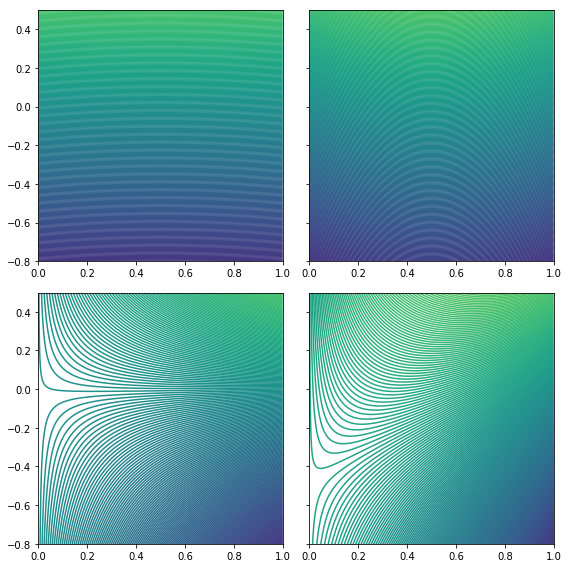

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

model = mm_sym
ax[0, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[0, 1].contour(model.pii, model.zz, model.V, 500)
ax[0, 0].set_ylim([-.8, .5])

model = mm_asym
ax[1, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[1, 1].contour(model.pii, model.zz, model.V, 500)

plt.tight_layout()
plt.savefig("V_HS.pdf")

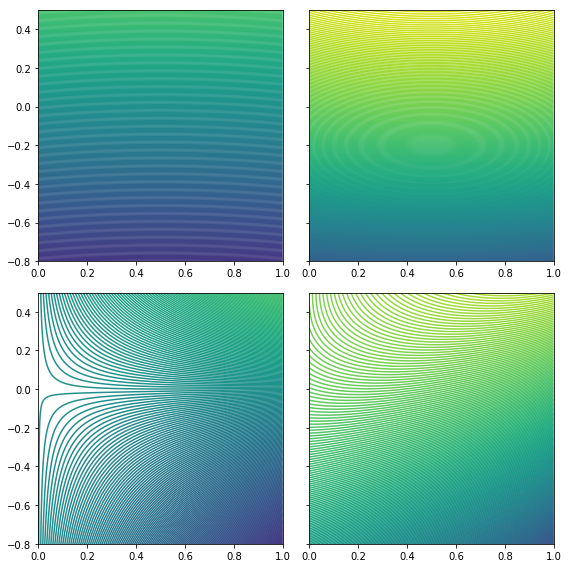

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

model = mm_sym_HSHS
ax[0, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[0, 1].contour(model.pii, model.zz, model.V, 500)
ax[0, 0].set_ylim([-.8, .5])

model = mm_asym_HSHS
ax[1, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[1, 1].contour(model.pii, model.zz, model.V, 500)

plt.tight_layout()
plt.savefig("V_HSHS_kappa.pdf")

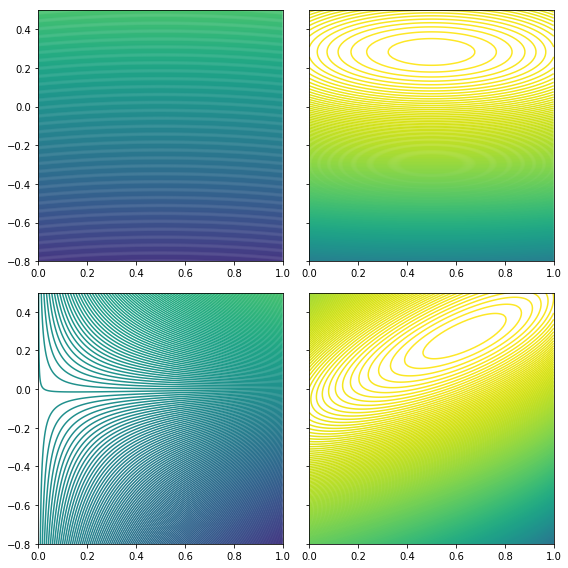

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

model = mm_sym_HSHS2
ax[0, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[0, 1].contour(model.pii, model.zz, model.V, 500)
ax[0, 0].set_ylim([-.8, .5])

model = mm_asym_HSHS2
ax[1, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[1, 1].contour(model.pii, model.zz, model.V, 500)

plt.tight_layout()
plt.savefig("V_HSHS_beta.pdf")

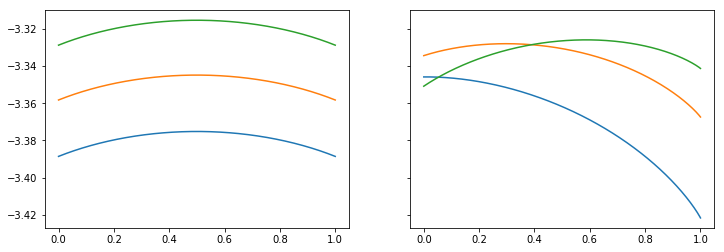

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

model = mm_sym
#plt.plot(model.pii[:, model.ind_med_z], model.V_noR[:, model.ind_med_z])
ax[0].plot(model.pii[:, model.ind_ld_z], model.V[:, model.ind_ld_z])
ax[0].plot(model.pii[:, model.ind_med_z], model.V[:, model.ind_med_z])
ax[0].plot(model.pii[:, model.ind_ud_z], model.V[:, model.ind_ud_z])

model = mm_asym
#plt.plot(model.pii[:, model.ind_med_z], model.V_noR[:, model.ind_med_z])
ax[1].plot(model.pii[:, model.ind_ld_z], model.V[:, model.ind_ld_z])
ax[1].plot(model.pii[:, model.ind_med_z], model.V[:, model.ind_med_z])
ax[1].plot(model.pii[:, model.ind_ud_z], model.V[:, model.ind_ud_z])

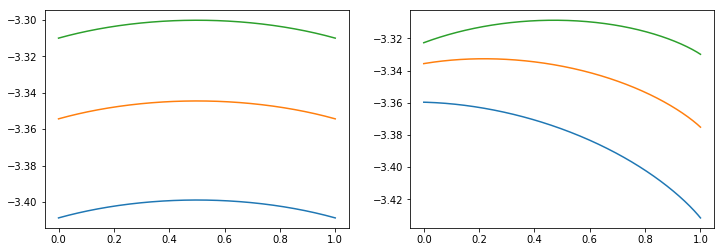

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

model = mm_sym
#plt.plot(model.pii[:, model.ind_med_z], model.V_noR[:, model.ind_med_z])
ax[0].plot(model.pii[:, model.ind_ld_z], model.V[:, model.ind_ld_z])
ax[0].plot(model.pii[:, model.ind_med_z], model.V[:, model.ind_med_z])
ax[0].plot(model.pii[:, model.ind_ud_z], model.V[:, model.ind_ud_z])

model = mm_asym
#plt.plot(model.pii[:, model.ind_med_z], model.V_noR[:, model.ind_med_z])
ax[1].plot(model.pii[:, model.ind_ld_z], model.V[:, model.ind_ld_z])
ax[1].plot(model.pii[:, model.ind_med_z], model.V[:, model.ind_med_z])
ax[1].plot(model.pii[:, model.ind_ud_z], model.V[:, model.ind_ud_z])

(-0.8, 0.4)

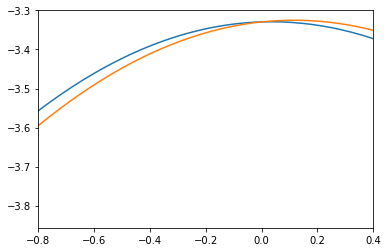

In [64]:
model = mm_asym
plt.plot(model.zz[model.ind_ld_r, :], model.V[model.ind_ld_r, :])
plt.plot(model.zz[model.ind_ud_r, :], model.V[model.ind_ud_r, :])
#plt.plot(model.zz[model.ind_med_r, :], model.V[model.ind_med_r, :])
plt.xlim([-.8, .4])

(-0.8, 0.4)

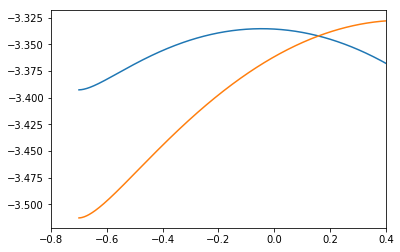

In [62]:
model = mm_asym
plt.plot(model.zz[0, :], model.V[0, :])
plt.plot(model.zz[-1, :], model.V[-1, :])
#plt.plot(model.zz[model.ind_med_r, :], model.V[model.ind_med_r, :])
plt.xlim([-.8, .4])

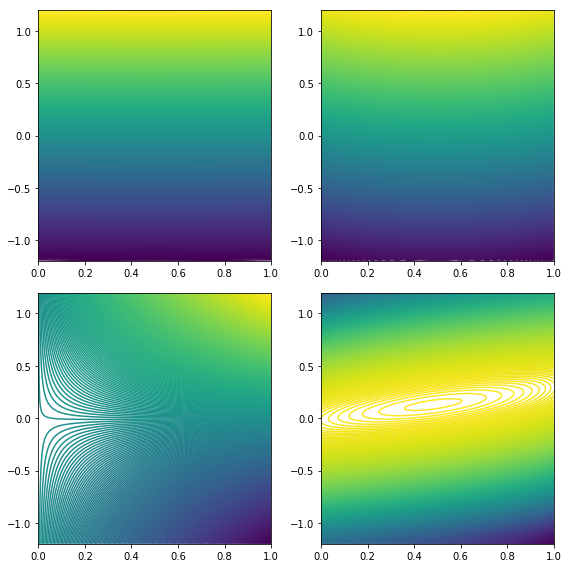

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

model = mm_sym
ax[0, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[0, 1].contour(model.pii, model.zz, model.V, 500)

model = mm_asym
ax[1, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[1, 1].contour(model.pii, model.zz, model.V, 500)

plt.tight_layout()

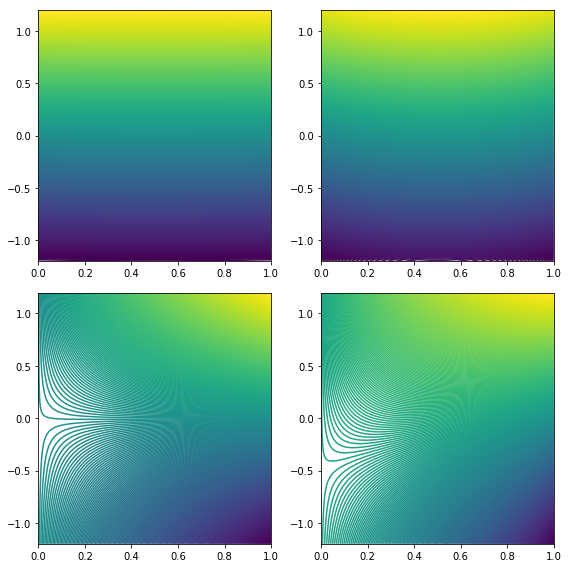

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

model = mm_sym
ax[0, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[0, 1].contour(model.pii, model.zz, model.V, 500)

model = mm_asym
ax[1, 0].contour(model.pii, model.zz, model.V_noR, 500)
ax[1, 1].contour(model.pii, model.zz, model.V, 500)

plt.tight_layout()

--------------------------
# Some other figures

------------------------
## Figure 2 - Local mean of the states

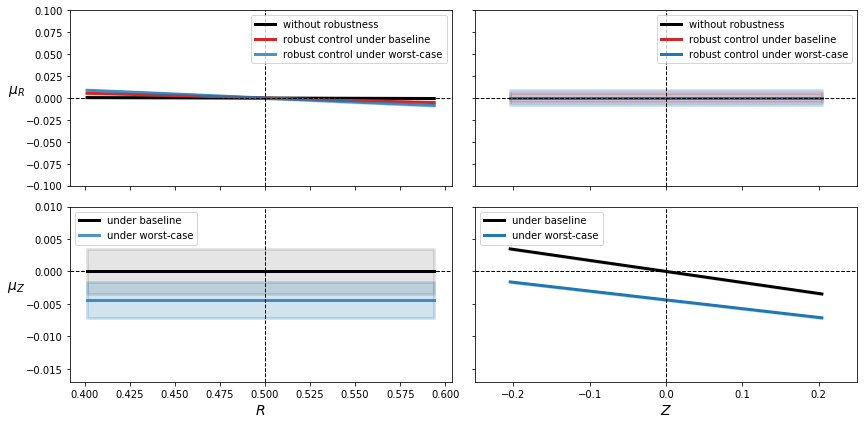

In [167]:
mm_sym.figure_states(ylim=[-.1, .1])
#plt.savefig('../latex/section2/figures/2cap_statedrifts_sym_nostructured.pdf')

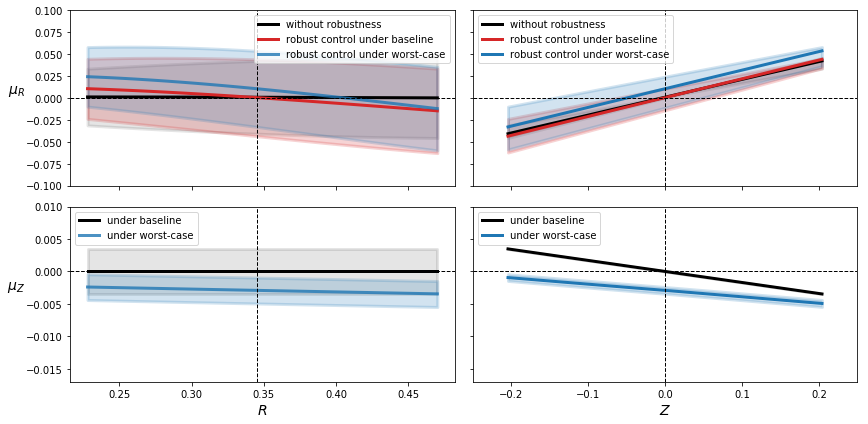

In [168]:
mm_asym.figure_states(ylim=[-.1, .1])
#plt.savefig('../latex/section2/figures/2cap_statedrifts_asym1_nostructured.pdf')

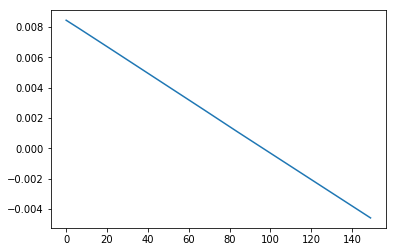

In [128]:
plt.plot(mm_asym.mu_z[mm_asym.ind_med_r, 25:175] - mm_asym.mu_z_wc[mm_asym.ind_med_r, 25:175])

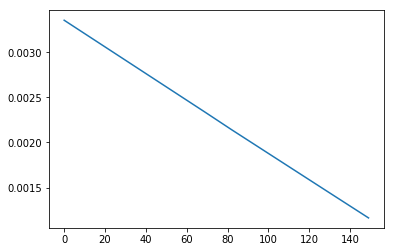

In [182]:
plt.plot(mm_asym.mu_z[mm_asym.ind_med_r, 25:175] - mm_asym.mu_z_wc[mm_asym.ind_med_r, 25:175])

--------------------
## Figure 4 - Aggregate dynamics

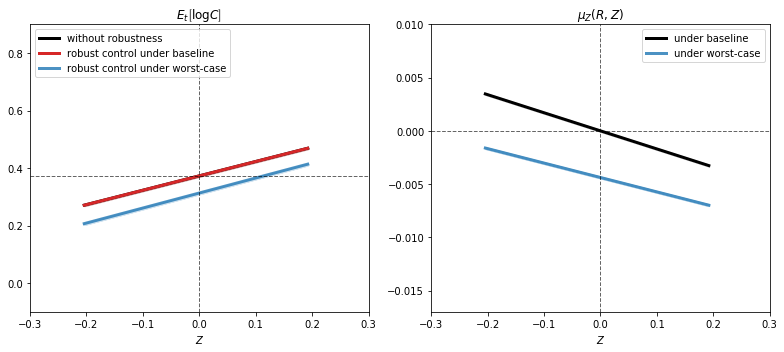

In [48]:
mm_sym.figure_drift()
#plt.savefig('../latex/section2/figures/2cap_drift_sym_nostuctured.pdf')

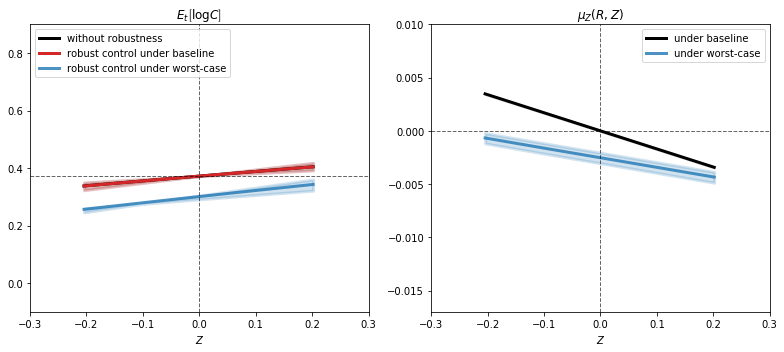

In [47]:
mm_asym.figure_drift()
#plt.savefig('../latex/section2/figures/2cap_drift_asym1_nostuctured.pdf')

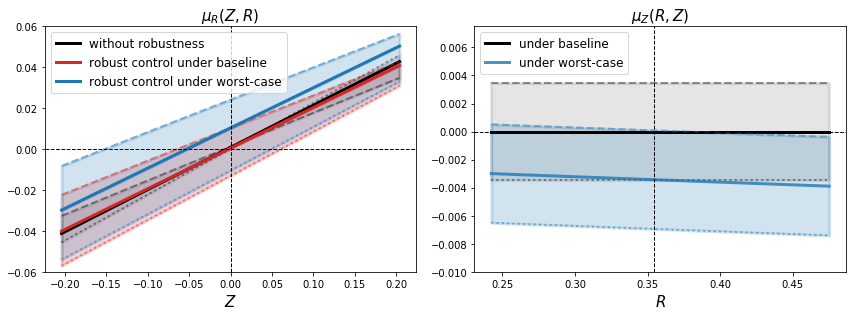

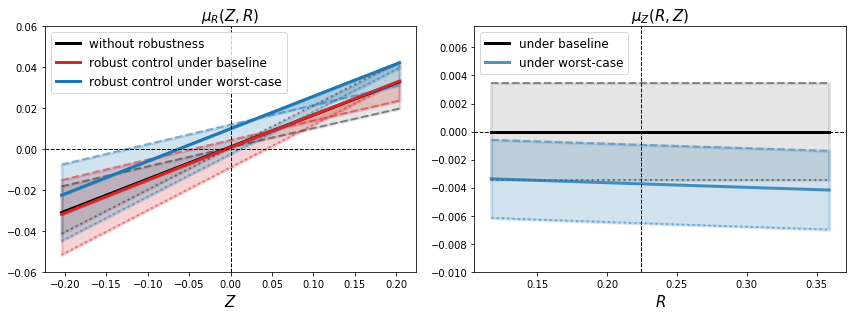

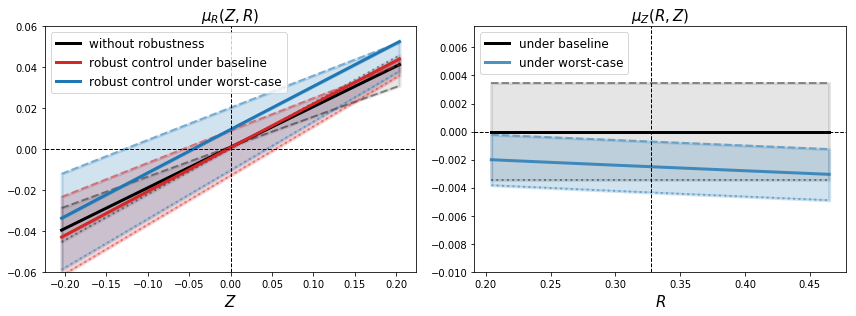

In [19]:
mm_asym.figure2_states(ylim_left=[-.06, .06], 
                       ylim_right=[-.01, .0075])
mm_asym_HSHS.figure2_states(ylim_left=[-.06, .06], 
                       ylim_right=[-.01, .0075])
mm_asym_HSHS2.figure2_states(ylim_left=[-.06, .06], 
                       ylim_right=[-.01, .0075])
